In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('data.csv', delimiter=',', encoding='ISO-8859-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Information of the columns in a data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150444 entries, 0 to 150443
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    150444 non-null  object 
 1   StockCode    150444 non-null  object 
 2   Description  149846 non-null  object 
 3   Quantity     150444 non-null  int64  
 4   InvoiceDate  150443 non-null  object 
 5   UnitPrice    150443 non-null  float64
 6   CustomerID   103940 non-null  float64
 7   Country      150443 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 9.2+ MB


In [4]:
# data.describe().T
data.describe()

,Quantity,UnitPrice,CustomerID
count,150444.000000,150443.000000,103940.000000
mean,9.034112,5.150935,15288.987560
std,275.919035,102.502582,1734.938978
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13854.000000
50%,3.000000,2.460000,15189.000000
75%,10.000000,4.210000,16871.000000
max,74215.000000,16888.020000,18283.000000


checking for null values

In [5]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,598
Quantity,0
InvoiceDate,1
UnitPrice,1
CustomerID,46504
Country,1


In [6]:
data.shape

(150444, 8)

Delete all the missing records

In [7]:
data.dropna(inplace=True)

In [8]:
print(f'total rows after missing value removal{data.shape}')

total rows after missing value removal(103940, 8)


Handling negative values

In [9]:
data = data[data['Quantity'] > 0]
data[data['UnitPrice']<0].shape[0]

0

In [10]:
data.drop(data[data['Quantity'] < 0].index, inplace=True)

In [11]:
data.shape

(101340, 8)

Calculation of total amount

In [12]:
data['Sales'] = data['Quantity'] * data['UnitPrice']
new_data = data.groupby('CustomerID')['Sales'].sum().reset_index()
new_data

,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,1823.43
2,12348.0,1487.24
3,12350.0,334.40
4,12352.0,1561.81
...,...,...
2227,18270.0,111.95
2228,18272.0,639.82
2229,18273.0,51.00
2230,18280.0,180.60


calculating the number of transactions of each customer

In [13]:
num_trans = data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
num_trans

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,84
2,12348.0,28
3,12350.0,17
4,12352.0,38
...,...,...
2227,18270.0,5
2228,18272.0,33
2229,18273.0,1
2230,18280.0,10


In [14]:
#Converting 'InvoiceDate' to DateTime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
#Calculating 'Last Transaction' Days:
data['Last Transaction'] = (data['InvoiceDate'].max() - data['InvoiceDate']).dt.days
#Grouping by 'CustomerID' and 'Country' and Calculating Maximum 'Last Transaction'
lt = data.groupby(['CustomerID', 'Country'])['Last Transaction'].max().reset_index()
#Merging with Number of Transactions
merge_table = pd.merge(lt, num_trans, how='inner', on='CustomerID')
new_df = pd.merge(merge_table, new_data, how='inner', on='CustomerID')
print(lt)
print(new_df)

      CustomerID         Country  Last Transaction
0        12346.0  United Kingdom                80
1        12347.0         Iceland               121
2        12348.0         Finland               112
3        12350.0          Norway                64
4        12352.0          Norway                51
...          ...             ...               ...
2229     18270.0  United Kingdom                20
2230     18272.0  United Kingdom                 1
2231     18273.0  United Kingdom                12
2232     18280.0  United Kingdom                32
2233     18283.0  United Kingdom                91

[2234 rows x 3 columns]
      CustomerID         Country  Last Transaction  InvoiceNo     Sales
0        12346.0  United Kingdom                80          1  77183.60
1        12347.0         Iceland               121         84   1823.43
2        12348.0         Finland               112         28   1487.24
3        12350.0          Norway                64         17    334.40
4  

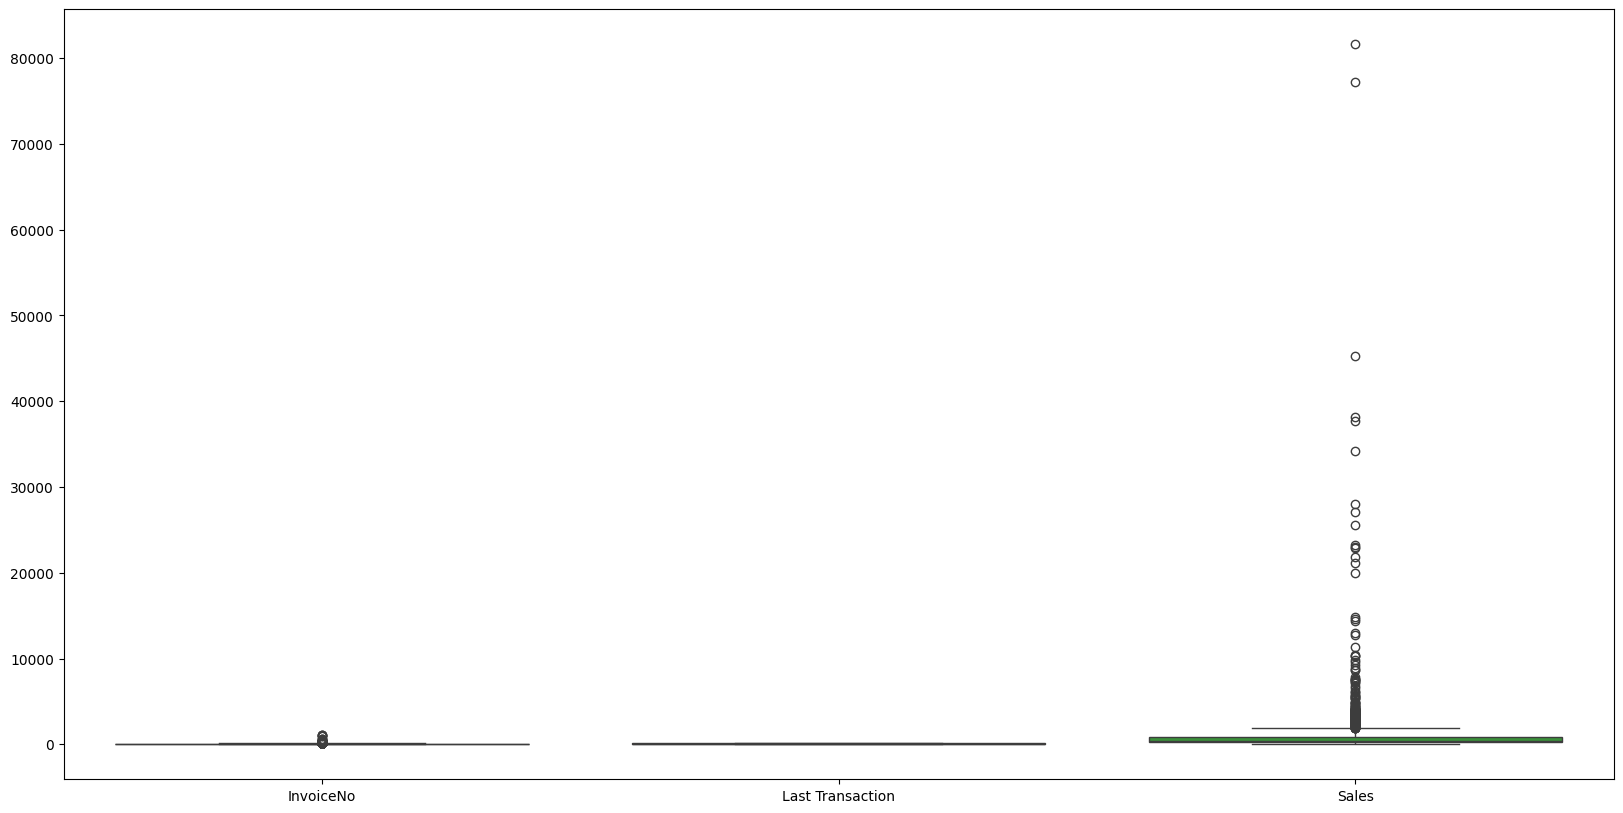

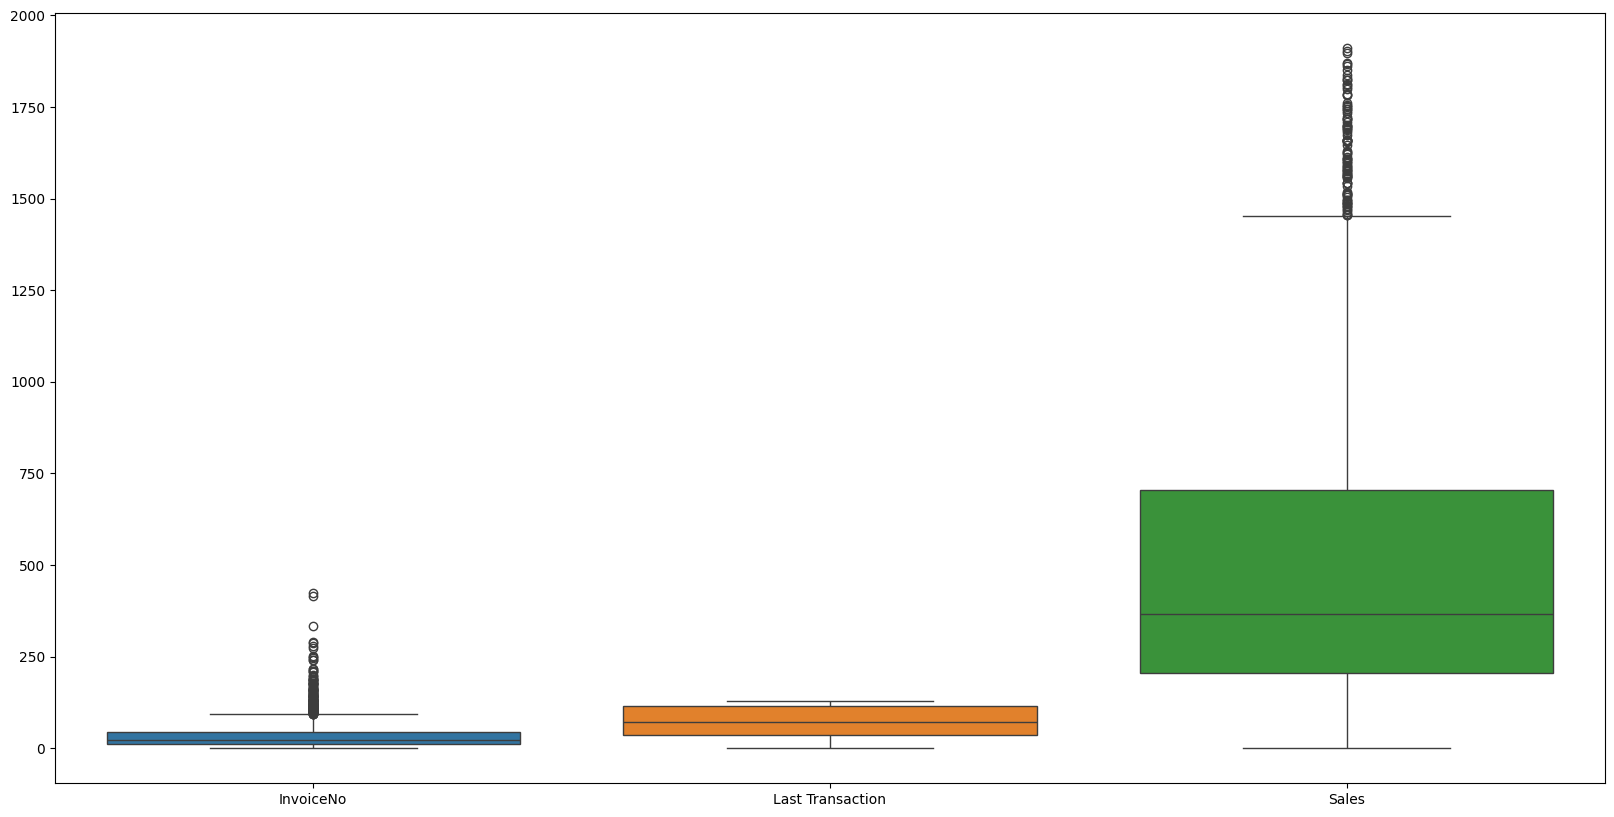

In [15]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=new_df[['InvoiceNo', 'Last Transaction', 'Sales']])
plt.show()

IQR = new_df['Sales'].quantile(0.75) - new_df['Sales'].quantile(0.25)
lower_limit = new_df['Sales'].quantile(0.25) - 1.5 * IQR
upper_limit = new_df['Sales'].quantile(0.75) + 1.5 * IQR
new_df_iqr = new_df[(new_df['Sales'] < upper_limit) & (new_df['Sales'] > lower_limit)]

plt.figure(figsize=(20, 10))
sns.boxplot(data=new_df_iqr[['InvoiceNo', 'Last Transaction', 'Sales']])
plt.show()

new_df_iqr.reset_index(drop=True, inplace=True)

In [16]:
from sklearn.preprocessing import MinMaxScaler
new2_df= new_df_iqr[['Last Transaction','InvoiceNo','Sales']]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new2_df)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = ['Last Transaction','InvoiceNo','Sales']
scaled_df['Country'] = new_df_iqr['Country']
scaled_df


,Last Transaction,InvoiceNo,Sales,Country
0,0.945312,0.196682,0.954455,Iceland
1,0.875000,0.063981,0.778398,Finland
2,0.500000,0.037915,0.174675,Norway
3,0.398438,0.087678,0.817449,Norway
4,0.320312,0.021327,0.099002,Belgium
...,...,...,...,...
2020,0.156250,0.009479,0.058181,United Kingdom
2021,0.007812,0.075829,0.334618,United Kingdom
2022,0.093750,0.000000,0.026263,United Kingdom
2023,0.250000,0.021327,0.094132,United Kingdom


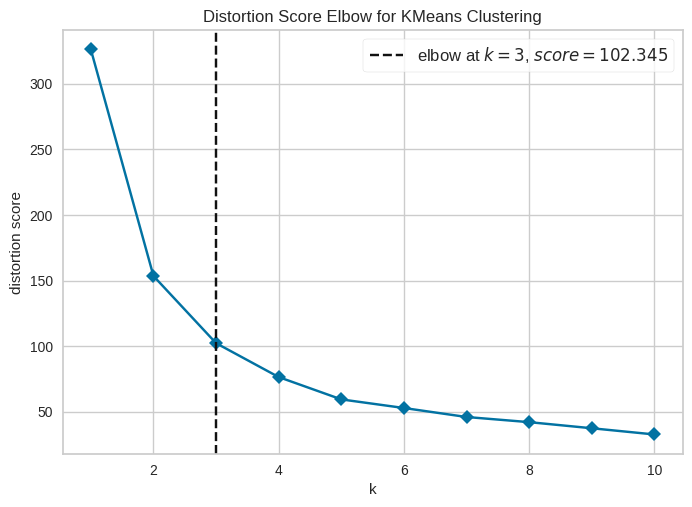

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
df_k=scaled_df.drop(columns=['Country'],axis=1)
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_k)        # Fit data to visualizer
visualizer.show()

In [18]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(df_k, model.labels_, metric='euclidean')
print(score)

from sklearn.cluster import AgglomerativeClustering
hierarchial = AgglomerativeClustering(n_clusters=3)
y_predicted_hierarchial = hierarchial.fit_predict(df_k)
df_k['clusters_hierarchial']= y_predicted_hierarchial
df_k.head(30)

0.3947933094110664


,Last Transaction,InvoiceNo,Sales,clusters_hierarchial
0,0.945312,0.196682,0.954455,1
1,0.875000,0.063981,0.778398,1
2,0.500000,0.037915,0.174675,0
3,0.398438,0.087678,0.817449,1
4,0.320312,0.021327,0.099002,0
5,0.390625,0.061611,0.250452,0
6,0.351562,0.049763,0.335435,0
7,0.390625,0.045024,0.208620,0
8,0.507812,0.030806,0.190490,0
9,0.851562,0.180095,0.852175,1
